# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [76]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [77]:
builders = tfds.list_builders()
print(builders)

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'cos_e', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'i_naturalist2017', 'image

In [78]:
data, info = tfds.load('mnist', with_info = True)
train_data, test_data = data['train'], data['test']

In [79]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [80]:
import numpy as np

In [81]:
num_items = 20
num_list = np.arange(num_items)

In [82]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [83]:
num_list_dataset

<TensorSliceDataset shapes: (), types: tf.int64>

In [84]:
for item in num_list_dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [85]:
import itertools

def gen():
    for i in itertools.count(1):
        yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen,
    (tf.int64, tf.int64),
    (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(3).as_numpy_iterator())

[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [86]:
'''for item in dataset:
    print(item)'''

'for item in dataset:\n    print(item)'

In [87]:
def gen(stop):
    for i in itertools.count(1):
        if i < stop:
            yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen, args = [10],
    output_types = (tf.int64, tf.int64),
    output_shapes = (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(5).as_numpy_iterator())

[(1, array([1])),
 (2, array([1, 1])),
 (3, array([1, 1, 1])),
 (4, array([1, 1, 1, 1])),
 (5, array([1, 1, 1, 1, 1]))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [88]:
dataset = num_list_dataset.repeat(3).batch(7)

In [89]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


In [90]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder = True)
# 남은거 제거

In [91]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [92]:
from tensorflow.data import Dataset

In [93]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x * 2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [94]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x + 1)

result

<MapDataset shapes: (), types: tf.int64>

In [95]:
elements = [ (1, 'one'), (2, 'two'), (3, 'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))

result = dataset.map(lambda x_int, y_str: x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

In [96]:
dataset = Dataset.range(3)

def g(x):
    return tf.constant(10.5), tf.constant(['One', 'Two', 'Three'])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [97]:
def h(x):
    return 10.5, ['One', 'Two', 'Three'], np.array([1.0, 2.0], dtype = np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [98]:
def i(x):
    return (10.5, [12, 11]), 'One', 'Two'

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [99]:
dataset = Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8])
dataset = dataset.filter(lambda x: x < 5)
list(dataset.as_numpy_iterator())

[1, 2, 3, 4]

In [100]:
def filter_fn(x):
    return tf.math.equal(x, 1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [101]:
dataset, info = tfds.load("imdb_reviews", with_info = True,
                           as_supervised = True)

In [102]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
    print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b"I can still remember first seeing this on TV. I couldn't believe TVNZ let it on! I had to own it! A lot of the humor will be lost on non-NZ'ers, but give it a go! <br /><br />Since finishing the Back of the Y series Matt and Chris have gone on to bigger and better(?) things. NZ's greatest dare-devil stuntman, Randy Campbell has often appeared on the British TV series Balls of Steel. Yes, he still f^@ks up all his stunts because he is too drunk.<br /><br />Also the 'house band' Deja Voodoo have since released 2 albums, Brown Sabbath and Back in Brown. The band consists of members of the Back of the Y team and singles such as 'I Would Give You One of My Beers (But I've Only Got 6)' and 'You Weren't Even Born in The 80's' continue their humor.<br /><br />The South-By-Southwest film festival also featured their feature length film 'The Devil Made Me Do It' which will be released early 2008 in NZ.<br /><br />All up, if you don't find th

### get_next()

In [103]:
dataset = Dataset.range(2)
for element in dataset:
    print(element)
    

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [104]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset shapes: (), types: tf.int64>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [105]:
a = np.random.randint(0, 10, size = (2, 3))
print(a)
dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)

print(iterator.get_next())
print(iterator.get_next())

[[1 9 0]
 [7 2 7]]
tf.Tensor([1 9 0], shape=(3,), dtype=int64)
tf.Tensor([7 2 7], shape=(3,), dtype=int64)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [106]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [107]:
(x_train, y_train), (x_test, y_test) = load_data()

In [108]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [109]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [110]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [111]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               

### 데이터 확인

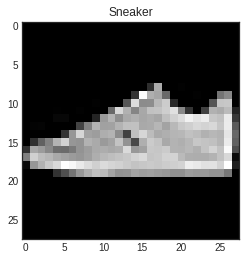

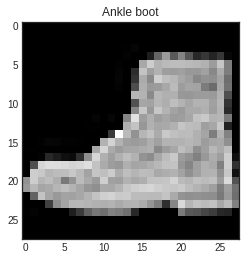

In [112]:
for image, label in train_ds.take(2):
    plt.title("{}".format(class_names[label[0]]))
    plt.imshow(image[0, :, :], cmap = 'gray')
    plt.show()

### 모델 생성
- 임의의 모델

In [113]:
def build_model():
    input = Input(shape = (28, 28), name = 'input')
    flatten = Flatten(input_shape = (28, 28), name = 'flatten')(input)
    hidden1 = Dense(256, kernel_initializer = 'he_normal', name = 'hidden1')(flatten)
    hidden1 = BatchNormalization()(hidden1)
    hidden1 = Activation('relu')(hidden1)
    dropout1 = Dropout(0.5)(hidden1)

    hidden2 = Dense(100, kernel_initializer = 'he_normal', name = 'hidden2')(dropout1)
    hidden2 = BatchNormalization()(hidden2)
    hidden2 = Activation('relu')(hidden2)
    dropout2 = Dropout(0.5)(hidden2)

    hidden3 = Dense(100, kernel_initializer = 'he_normal', name = 'hidden3')(dropout2)
    hidden3 = BatchNormalization()(hidden3)
    hidden3 = Activation('relu')(hidden3)
    dropout3 = Dropout(0.5)(hidden3)

    hidden4 = Dense(50, kernel_initializer = 'he_normal', name = 'hidden4')(dropout3)
    hidden4 = BatchNormalization()(hidden4)
    hidden4 = Activation('relu')(hidden4)
    dropout4 = Dropout(0.5)(hidden4)

    output = Dense(10, activation = 'softmax', name = 'output')(dropout4)

    model = Model(inputs = [input],
                  outputs = output)
    
    return model

    

In [114]:
model = build_model()

In [115]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)              

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [116]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [117]:
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [118]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [119]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [120]:
epochs = 20

for epoch in range(epochs):
    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    template = "Epochs: {:3d}\tLoss: {:.4f}\tAccuracy: {:.4f}\tTest Loss: {:.4f}\tTest Accuracy: {:.4f}"
    print(template.format(epoch + 1,
                          train_loss.result(),
                          train_accuracy.result() * 100,
                          test_loss.result(),
                          test_accuracy.result() * 100))

Epochs:   1	Loss: 0.4914	Accuracy: 82.3550	Test Loss: 0.4461	Test Accuracy: 83.3900
Epochs:   2	Loss: 0.4328	Accuracy: 84.2642	Test Loss: 0.4137	Test Accuracy: 84.7050
Epochs:   3	Loss: 0.4007	Accuracy: 85.4117	Test Loss: 0.4002	Test Accuracy: 85.1667
Epochs:   4	Loss: 0.3785	Accuracy: 86.2008	Test Loss: 0.3849	Test Accuracy: 85.7625
Epochs:   5	Loss: 0.3621	Accuracy: 86.7380	Test Loss: 0.3813	Test Accuracy: 86.0240
Epochs:   6	Loss: 0.3485	Accuracy: 87.1814	Test Loss: 0.3761	Test Accuracy: 86.2700
Epochs:   7	Loss: 0.3370	Accuracy: 87.5800	Test Loss: 0.3733	Test Accuracy: 86.3757
Epochs:   8	Loss: 0.3270	Accuracy: 87.9135	Test Loss: 0.3706	Test Accuracy: 86.5550
Epochs:   9	Loss: 0.3182	Accuracy: 88.2144	Test Loss: 0.3676	Test Accuracy: 86.7256
Epochs:  10	Loss: 0.3105	Accuracy: 88.4752	Test Loss: 0.3656	Test Accuracy: 86.8670
Epochs:  11	Loss: 0.3032	Accuracy: 88.7326	Test Loss: 0.3647	Test Accuracy: 86.9409
Epochs:  12	Loss: 0.2966	Accuracy: 88.9633	Test Loss: 0.3655	Test Accuracy: 

### 모델 학습 : 2번째 방법 (Keras)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size = 0.3,
                                                  random_state = 777)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


model = build_model()

model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
(10000, 28, 28)
(10000,)
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_____________________________________________

5~6분 소요

In [123]:
from tensorflow.keras.callbacks import EarlyStopping


In [124]:
early_stopping_cb = EarlyStopping(patience = 3, monitor = 'val_loss',
                                  restore_best_weights = True)

history = model.fit(x_train, y_train,
                    batch_size = 256,
                    epochs = 200,
                    shuffle = True,
                    validation_data = (x_val, y_val),
                    callbacks = [early_stopping_cb])

Epoch 1/200
165/165 [==============================] - 2s 14ms/step - loss: 2.6279 - accuracy: 0.1322 - val_loss: 1.9861 - val_accuracy: 0.4478
Epoch 2/200
165/165 [==============================] - 2s 12ms/step - loss: 2.2597 - accuracy: 0.2027 - val_loss: 1.6766 - val_accuracy: 0.5726
Epoch 3/200
165/165 [==============================] - 2s 12ms/step - loss: 2.0154 - accuracy: 0.2724 - val_loss: 1.4725 - val_accuracy: 0.5972
Epoch 4/200
165/165 [==============================] - 2s 12ms/step - loss: 1.8524 - accuracy: 0.3191 - val_loss: 1.3399 - val_accuracy: 0.6234
Epoch 5/200
165/165 [==============================] - 2s 12ms/step - loss: 1.7267 - accuracy: 0.3640 - val_loss: 1.2446 - val_accuracy: 0.6435
Epoch 6/200
165/165 [==============================] - 2s 12ms/step - loss: 1.6205 - accuracy: 0.4024 - val_loss: 1.1604 - val_accuracy: 0.6536
Epoch 7/200
165/165 [==============================] - 2s 12ms/step - loss: 1.5271 - accuracy: 0.4325 - val_loss: 1.0903 - val_accuracy:

In [125]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 모델 평가

In [126]:
model.evaluate(x_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.8336


[0.4617789089679718, 0.8335999846458435]

### 결과 확인

In [127]:
test_img = x_test[0, :, :]
print(test_img.shape)

(28, 28)


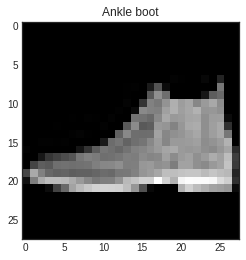

In [128]:
plt.title(class_names[y_test[0]])
plt.imshow(test_img, cmap = 'gray')
plt.show()

In [129]:
pred = model.predict(test_img.reshape(1, 28, 28))

In [130]:
pred.shape

(1, 10)

In [131]:
pred

array([[6.1473991e-05, 7.5801370e-05, 3.1962045e-05, 1.6461965e-04,
        4.0492916e-05, 4.8948377e-02, 2.7191260e-05, 1.4469644e-01,
        7.1263866e-04, 8.0524105e-01]], dtype=float32)

In [132]:
class_names[np.argmax(pred)]

'Ankle boot'

### Test Batch Dataset

In [133]:
test_batch = x_test[:32, :, :]
test_batch_y = y_test[:32]
print(test_batch.shape)

(32, 28, 28)


In [134]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

In [135]:
preds_arg = np.argmax(preds, -1)

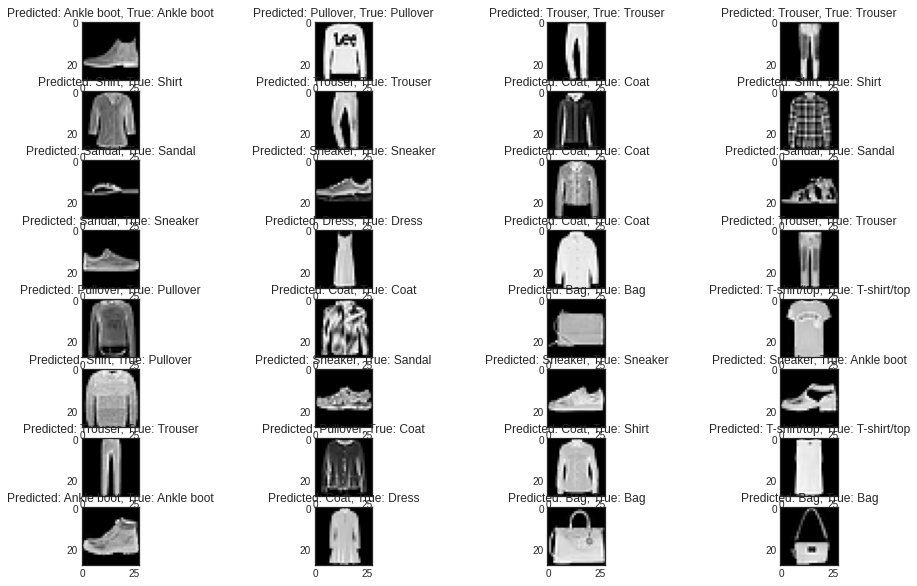

In [136]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

plt.figure(figsize = (16, 10))

for idx in range(1, 33, 1):
    plt.subplot(num_rows, num_cols, idx)
    plt.title("Predicted: {}, True: {}".format(class_names[preds_arg[idx - 1]],
                                               class_names[test_batch_y[idx - 1]]))
    plt.imshow(test_batch[idx - 1], cmap = 'gray')

plt.show()